<a href="https://colab.research.google.com/github/renatamontanhana/Machine_Learning_Algoritmo_Naive_Bayes_CDPRO/blob/main/Treinamento_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/imigrantes_canada.csv')

In [ ]:
df

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnã,Ásia,Sudeste Asiático,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Saara Ocidental,África,Norte da África,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Iémen,Ásia,Ásia Ocidental,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
193,Zâmbia,África,África Oriental,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

In [ ]:
df.set_index('País', inplace=True)

In [ ]:
df

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argélia,África,Norte da África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnã,Ásia,Sudeste Asiático,1191,1829,2162,3404,7583,5907,2741,1406,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Saara Ocidental,África,Norte da África,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Iémen,Ásia,Ásia Ocidental,1,2,1,6,0,18,7,12,...,161,140,122,133,128,211,160,174,217,2985


In [ ]:
anos = list(map(str, range(1980, 2014)))

In [ ]:
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [ ]:
brasil = df.loc['Brasil', anos]

In [ ]:
brasil

1980     211
1981     220
1982     192
1983     139
1984     145
1985     130
1986     205
1987     244
1988     394
1989     650
1990     650
1991     877
1992    1066
1993     866
1994     566
1995     572
1996     586
1997     591
1998     531
1999     626
2000     845
2001     847
2002     745
2003     839
2004     917
2005     969
2006    1181
2007    1746
2008    2138
2009    2509
2010    2598
2011    1508
2012    1642
2013    1714
Name: Brasil, dtype: object

In [ ]:
brasil_dict = {'ano': brasil.index.tolist(), 'imigrantes': brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dict)

In [ ]:
dados_brasil

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145
5,1985,130
6,1986,205
7,1987,244
8,1988,394
9,1989,650


In [ ]:
import matplotlib.pyplot as plt


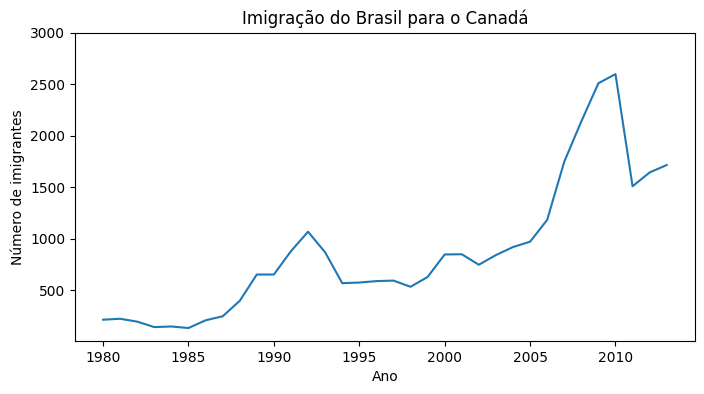

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.title('Imigração do Brasil para o Canadá')
plt.xlabel('Ano')
plt.ylabel('Número de imigrantes')
plt.xticks(['1980','1985', '1990', '1995', '2000', '2005', '2010'])
plt.yticks([500, 1000, 1500, 2000, 2500, 3000])
plt.show()

In [ ]:
df_comparacao = df.loc[['Brasil', 'Argentina'], anos]

In [ ]:
df_comparacao = df_comparacao.T

# Como resultado temos uma coluna com os anos e duas colunas para cada país contendo o número de imigrantes.

df_comparacao.head()

País,Brasil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237


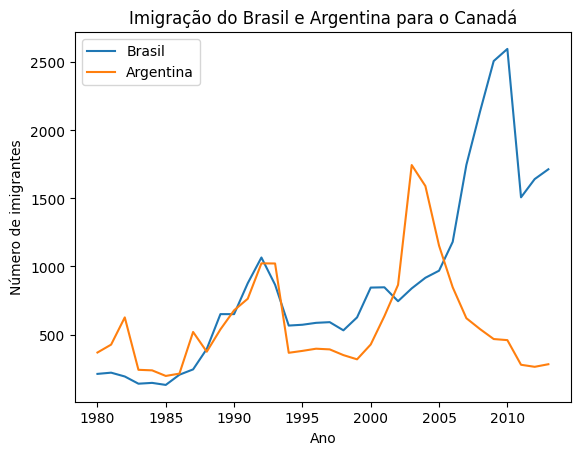

In [ ]:
plt.plot(df_comparacao['Brasil'],label = 'Brasil')
plt.plot(df_comparacao['Argentina'],label ='Argentina')
plt.title('Imigração do Brasil e Argentina para o Canadá')
plt.xlabel('Ano')
plt.ylabel('Número de imigrantes')
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.legend()
plt.show()

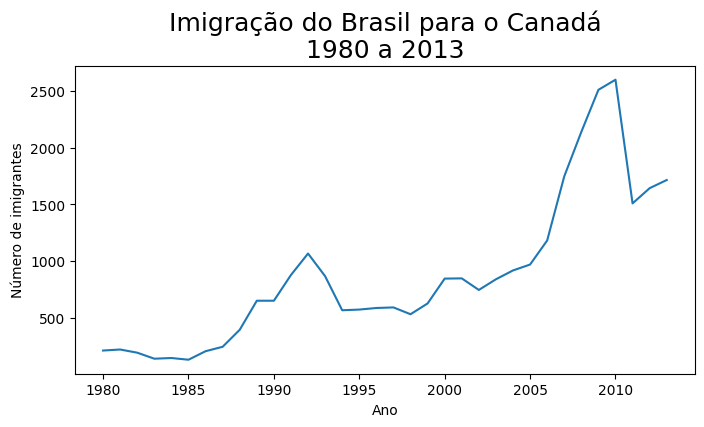

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18)
ax.set_xlabel('Ano')
ax.set_ylabel('Número de imigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

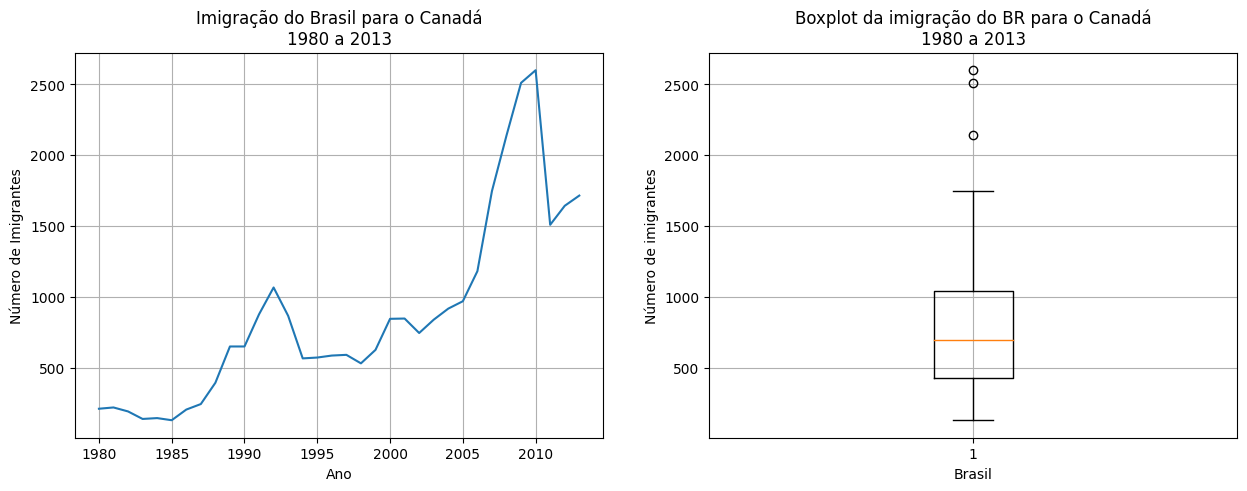

In [ ]:
fig,axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].plot(dados_brasil['ano'], dados_brasil['imigrantes'])
axs[0].set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
axs[0].set_xlabel('Ano')
axs[0]. set_ylabel('Número de Imigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].grid()

axs[1].boxplot(dados_brasil['imigrantes'])
axs[1].set_title('Boxplot da imigração do BR para o Canadá\n1980 a 2013')
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Número de imigrantes')
axs[1].grid()
plt.show()

In [ ]:
dados_brasil.describe()

,imigrantes
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


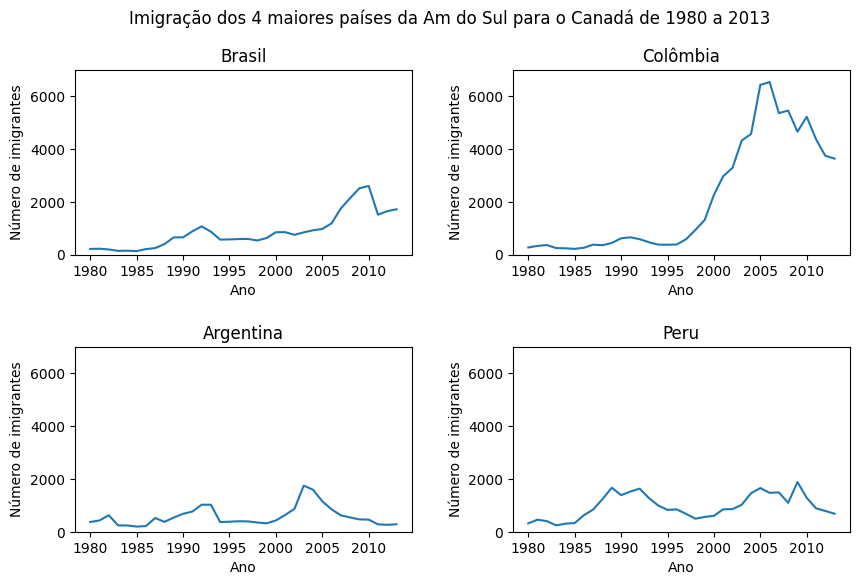

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Imigração dos 4 maiores países da Am do Sul para o Canadá de 1980 a 2013')

axs[0,0].plot(df.loc['Brasil', anos])
axs[0,0].set_title('Brasil')

axs[0,1].plot(df.loc['Colômbia', anos])
axs[0,1].set_title('Colômbia')

axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

axs[1,1].plot(df.loc['Peru', anos])
axs[1,1].set_title('Peru')

for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))

  for ax in axs.flat:
    ax.set_xlabel('Ano')
    ax.set_ylabel('Número de imigrantes')

ymin = 0
ymax = 7000

for ax in axs.ravel():
  ax.set_ylim(ymin,ymax)

plt.show()